## Preprocessing

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from google.colab import files
import os
from tensorflow.keras.callbacks import ModelCheckpoint
# !pip install keras-tuner
# import keras_tuner as kt


#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
application_df.nunique()
#name not unique but EIN is

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [4]:
name_count = application_df.NAME.value_counts()

In [5]:
name_binning = name_count[name_count>50]
name_binning

PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                        408
PTA TEXAS CONGRESS                                                     368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                          331
ALPHA PHI SIGMA                                                        313
TOASTMASTERS INTERNATIONAL                                             293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                      287
LITTLE LEAGUE BASEBALL INC                                             277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                               266
MOMS CLUB                                                              210
INTERNATIONAL ASSOCIATION

In [6]:
# use the variable name `application_types_to_replace`
names_to_replace = list(name_count[name_count<100].index)

# Replace in dataframe
for name in names_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(name,"Other")

# Check to make sure binning was successful
application_df['NAME'].value_counts()

Other                                                                 25987
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [7]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df = application_df.drop(['EIN'], axis=1)
df

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,Other,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,Other,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,Other,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,Other,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,Other,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...
34294,Other,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,Other,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,Other,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [8]:
df.STATUS.value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [9]:
df = df[df["STATUS"]==1]
df = df.drop(["STATUS"], axis=1)
df

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,Other,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
1,Other,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590,1
2,Other,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,Other,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
4,Other,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,Other,T4,Independent,C1000,ProductDev,Association,0,N,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
34296,Other,T3,CompanySponsored,C2000,Preservation,Association,0,N,5000,0
34297,Other,T5,Independent,C3000,ProductDev,Association,0,N,5000,1


In [10]:
# Determine the number of unique values in each column.
print(df.nunique())

NAME                        31
APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [11]:
# Look at APPLICATION_TYPE value counts for binning
app_val_counts = df.APPLICATION_TYPE.value_counts()
app_val_counts

T3     27032
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [12]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_val_counts[app_val_counts<1000].index)

# Replace in dataframe
for app in application_types_to_replace:
    df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
df['APPLICATION_TYPE'].value_counts()

T3       27032
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [13]:
# Look at CLASSIFICATION value counts for binning
class_val_counts = df.CLASSIFICATION.value_counts()
class_val_counts

C1000    17323
C2000     6073
C1200     4837
C3000     1918
C2100     1882
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [14]:
# Look at CLASSIFICATION value counts >1
app_binning = class_val_counts[class_val_counts>1]
app_binning

C1000    17323
C2000     6073
C1200     4837
C3000     1918
C2100     1882
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [15]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_val_counts[class_val_counts<1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
df['CLASSIFICATION'].value_counts()

C1000    17323
C2000     6073
C1200     4837
Other     2261
C3000     1918
C2100     1882
Name: CLASSIFICATION, dtype: int64

In [16]:
# Convert categorical data to numeric with `pd.get_dummies`
df = pd.get_dummies(df, dtype = float)
df.head(10)

,ASK_AMT,IS_SUCCESSFUL,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_HABITAT FOR HUMANITY INTERNATIONAL INC,NAME_HONOR SOCIETY OF PHI KAPPA PHI,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,31452,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,7508025,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,94389,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# Split our preprocessed data into our features and target arrays

#target variable
y = df['IS_SUCCESSFUL'].values
y

array([1, 1, 0, ..., 0, 1, 0])

In [18]:
#features (drop target)
X = df.drop('IS_SUCCESSFUL', axis=1).values
X

array([[5.0000000e+03, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0859000e+05, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [5.0000000e+03, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       ...,
       [5.0000000e+03, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [5.0000000e+03, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [3.6500179e+07, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]])

In [19]:
# Split the preprocessed data into a training and testing dataset using SKLearn
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 35)

In [20]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
X_train_scaled

array([[-0.03105041, -0.09352073, -0.11224271, ..., -0.07529674,
         0.02858588, -0.02858588],
       [-0.03105041, -0.09352073, -0.11224271, ..., -0.07529674,
         0.02858588, -0.02858588],
       [-0.03105041, -0.09352073, -0.11224271, ..., -0.07529674,
         0.02858588, -0.02858588],
       ...,
       [-0.03105041, -0.09352073, -0.11224271, ..., -0.07529674,
         0.02858588, -0.02858588],
       [-0.03105041, -0.09352073,  8.90926484, ..., -0.07529674,
         0.02858588, -0.02858588],
       [-0.03105041, -0.09352073, -0.11224271, ..., -0.07529674,
         0.02858588, -0.02858588]])

## Compile, Train and Evaluate the Model

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

#Keras Sequential Model
nn_model = tf.keras.models.Sequential()

nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=len(X_train_scaled[0]))) #input layer

nn_model.add(tf.keras.layers.Dense(units=60, activation="relu")) #hidden layer 1
nn_model.add(tf.keras.layers.Dense(units=40, activation="relu")) #hidden layer 2
nn_model.add(tf.keras.layers.Dense(units=20, activation="relu")) #hidden layer 3

nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid")) #output layer


# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                5680      
                                                                 
 dense_1 (Dense)             (None, 60)                4860      
                                                                 
 dense_2 (Dense)             (None, 40)                2440      
                                                                 
 dense_3 (Dense)             (None, 20)                820       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 13,821
Trainable params: 13,821
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
os.makedirs("model_checkpoints4/",exist_ok=True) #okay if directory already exists
path = "model_checkpoints4/weights.{epoch:02d}.hdf5"
cp = ModelCheckpoint(filepath=path,save_weights_only=True,period=5)


In [25]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100,callbacks=[cp])

Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5130 - accuracy: 0.7426
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4936 - accuracy: 0.7550
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4910 - accuracy: 0.7551
Epoch 4/100
804/804 [==============================] - 3s 3ms/step - loss: 0.4886 - accuracy: 0.7565
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4874 - accuracy: 0.7588
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4865 - accuracy: 0.7600
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4858 - accuracy: 0.7595
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4849 - accuracy: 0.7590
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4844 - accuracy: 0.7610
Epoch 10/100
804/804 [==============================] - 3s 4ms/step - loss: 0.4825 - accura

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5265 - accuracy: 0.7575 - 548ms/epoch - 2ms/step
Loss: 0.5264509916305542, Accuracy: 0.7575227618217468


In [27]:
# Export our model to HDF5 file
os.makedirs("Models/",exist_ok=True)
nn_model.save("Models/Optimization_3.h5")
files.download("Models/Optimization_3.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

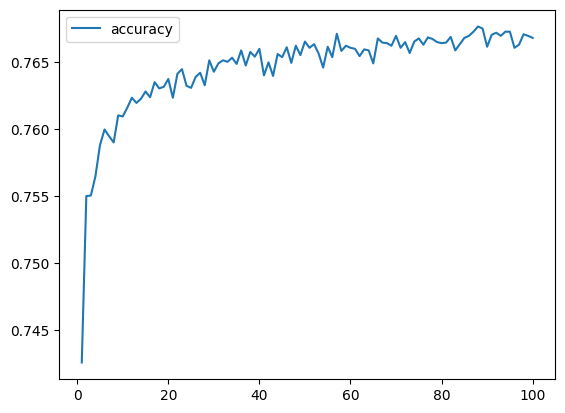

In [28]:
history_df = pd.DataFrame(fit_model.history)
history_df.index+=1 
history_df.plot(y="accuracy")
#convergence not reached due to variability in plot

<Axes: >

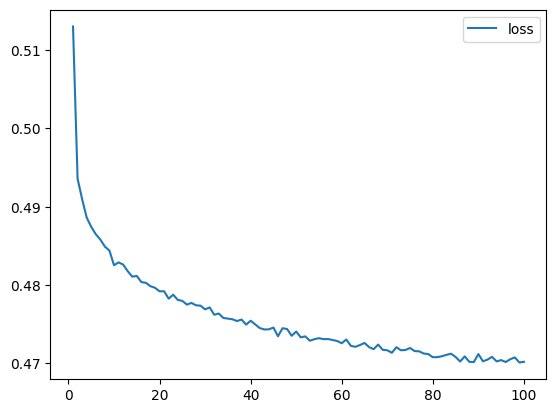

In [29]:
history_df.plot(y="loss")

In [30]:
# Train the model
fit_model_1 = nn_model.fit(X_train_scaled, y_train, epochs=200,callbacks=[cp])

Epoch 1/200
804/804 [==============================] - 3s 4ms/step - loss: 0.4700 - accuracy: 0.7665
Epoch 2/200
804/804 [==============================] - 2s 2ms/step - loss: 0.4725 - accuracy: 0.7666
Epoch 3/200
804/804 [==============================] - 2s 2ms/step - loss: 0.4703 - accuracy: 0.7670
Epoch 4/200
804/804 [==============================] - 2s 2ms/step - loss: 0.4702 - accuracy: 0.7668
Epoch 5/200
804/804 [==============================] - 2s 2ms/step - loss: 0.4692 - accuracy: 0.7671
Epoch 6/200
804/804 [==============================] - 2s 3ms/step - loss: 0.4695 - accuracy: 0.7673
Epoch 7/200
804/804 [==============================] - 3s 3ms/step - loss: 0.4694 - accuracy: 0.7666
Epoch 8/200
804/804 [==============================] - 2s 3ms/step - loss: 0.4692 - accuracy: 0.7670
Epoch 9/200
804/804 [==============================] - 2s 2ms/step - loss: 0.4703 - accuracy: 0.7671
Epoch 10/200
804/804 [==============================] - 2s 2ms/step - loss: 0.4700 - accura

In [31]:
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5939 - accuracy: 0.7571 - 369ms/epoch - 1ms/step
Loss: 0.5938620567321777, Accuracy: 0.7570562362670898


<Axes: >

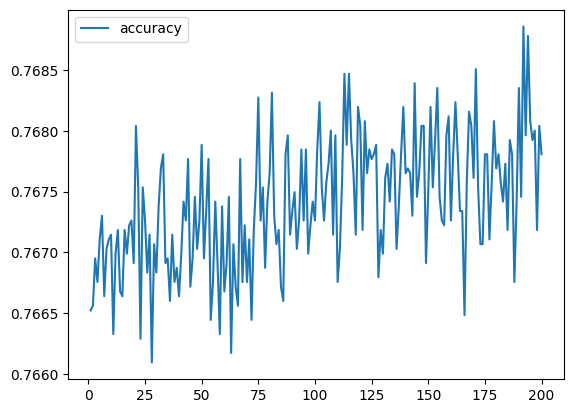

In [32]:
history_df = pd.DataFrame(fit_model_1.history)
history_df.index+=1 
history_df.plot(y="accuracy")
#convergence not reached due to variability in plot

<Axes: >

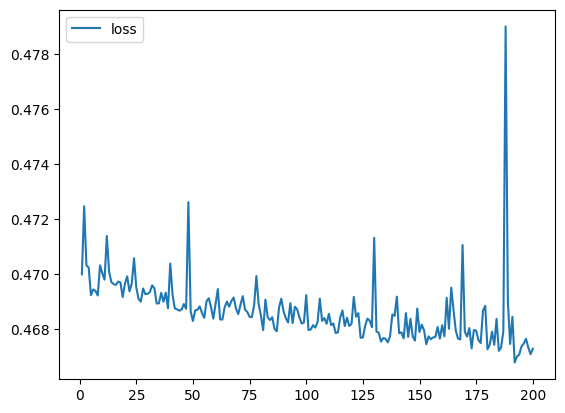

In [33]:
history_df.plot(y="loss")